In [2]:
# Importing the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

In [3]:
# Loading the file
df=pd.read_csv('gld_price_data.csv')
df

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.1800,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.2850,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.1670,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.0530,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.5900,1.557099
...,...,...,...,...,...,...
2285,5/8/2018,2671.919922,124.589996,14.060000,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.370000,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.410000,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.380000,15.5600,1.193118


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [5]:
df.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [6]:
#statistical measures of data
df.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [7]:
correlation =df.corr()

<AxesSubplot:>

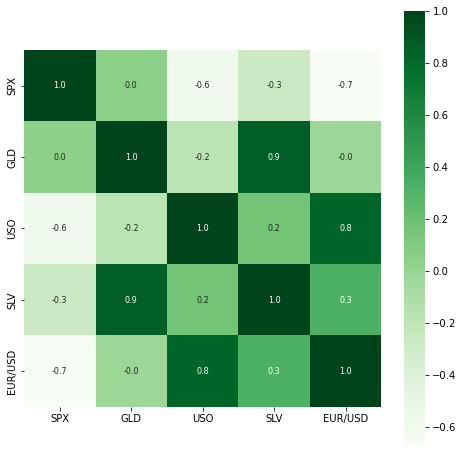

In [11]:
plt.figure(figsize = (8,8))
sns.heatmap(correlation, cbar=True, square=True,fmt='0.1f', annot=True, annot_kws={'size':8},cmap='Greens')

In [12]:
#Let's check the correlated values for gold
correlation['GLD']

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64

C:\Users\ajays\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='GLD', ylabel='Density'>

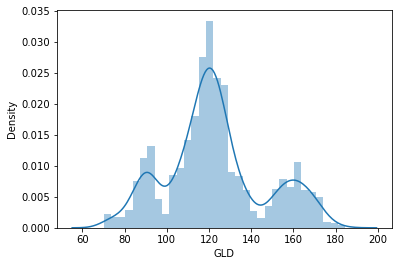

In [13]:
# Checking the distribution of Gold price using distplot
sns.distplot(df['GLD'])

# Splitting the features and Targets 

In [14]:
X = df.drop(['Date','GLD'],axis=1)
Y = df['GLD']

In [18]:
X

,SPX,USO,SLV,EUR/USD
0,1447.160034,78.470001,15.1800,1.471692
1,1447.160034,78.370003,15.2850,1.474491
2,1411.630005,77.309998,15.1670,1.475492
3,1416.180054,75.500000,15.0530,1.468299
4,1390.189941,76.059998,15.5900,1.557099
...,...,...,...,...
2285,2671.919922,14.060000,15.5100,1.186789
2286,2697.790039,14.370000,15.5300,1.184722
2287,2723.070068,14.410000,15.7400,1.191753
2288,2730.129883,14.380000,15.5600,1.193118


In [19]:
Y

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64

Splitting into Training & Testing Data

In [20]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y, test_size=0.2, random_state=2)

In [22]:
#Training the Model
regressor= RandomForestRegressor(n_estimators=100)
regressor.fit(X_train,Y_train)

RandomForestRegressor()

Model Evaluation


In [23]:
test_prediction = regressor.predict(X_test)
test_prediction

array([168.59439918,  81.78939998, 116.3469    , 127.62410088,
       120.71100121, 154.74439817, 150.97579885, 126.05790027,
       117.53539876, 125.99770089, 116.83930082, 171.77440015,
       141.86119905, 167.84009827, 115.18999994, 117.53600035,
       139.28520326, 170.68380177, 159.43140284, 158.93379949,
       155.1459002 , 124.81890011, 175.90409982, 156.98390382,
       125.29230038,  93.85349961,  77.55540018, 120.63079991,
       119.06259962, 167.59079952,  88.0977013 , 125.29230049,
        91.2775006 , 117.63400055, 121.14609916, 136.56300071,
       115.43940124, 115.12160103, 145.7928993 , 107.2484009 ,
       104.71520267,  87.16619801, 126.3746008 , 117.74300063,
       151.4755983 , 119.63959994, 108.36209991, 108.1642983 ,
        93.15590074, 127.0189979 ,  74.85580045, 113.71439956,
       121.16850016, 111.24999935, 118.88729901, 120.45479933,
       159.46399986, 167.48090102, 147.07619702,  85.92799873,
        94.48760017,  86.84289871,  90.59400028, 118.94

In [24]:
# Checking the error using R squared error
error_score = metrics.r2_score(Y_test,test_prediction)

In [25]:
error_score

0.9893461043682784

The score is good enough.So the model is performing well